# 계절성 및 지역 이벤트 요인 결합 분석 데이터 병합 및 전처리

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import requests
from branca.colormap import linear

plt.rcParams['font.family'] = 'AppleGothic'


# 1. 서울시 상권분석서비스(추정매출-행정동)

df = pd.read_csv('./social_data/서울시 상권분석서비스(추정매출-행정동).csv', encoding='EUC-KR',on_bad_lines='skip',engine='python' ) 
df = df.drop(columns=['행정동_코드','서비스_업종_코드']) 
df # 67900 rows

,기준_년분기_코드,행정동_코드_명,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,20241,청운효자동,한식음식점,3282036149,102492,2359720647,922315502,381912382,465137733,455857239,...,25725,1622,49367,41053,470,12429,22034,18544,19637,17313
1,20241,청운효자동,일식음식점,315907116,11835,225051104,90856012,26359701,31427632,60383694,...,2683,161,4925,6023,204,3395,2772,1733,1966,879
2,20241,청운효자동,양식음식점,2582745698,49217,1540711320,1042034378,148589304,285185261,367815477,...,16503,2787,14393,32370,233,13771,14934,7816,6618,3394
3,20241,청운효자동,제과점,548138245,41460,335822266,212315979,48215205,59542823,73387225,...,11458,351,13280,26768,216,8425,10838,7637,7641,5291
4,20241,청운효자동,치킨전문점,78178614,2965,48075887,30102727,6755318,8133215,7476153,...,1889,496,1467,1406,24,303,667,593,747,537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67895,20244,둔촌2동,가구,90470262,115,42397965,48072297,7940369,10826095,2312280,...,42,0,46,69,0,5,27,19,23,41
67896,20244,둔촌2동,철물점,294414379,2346,261540109,32874270,127160676,23911311,53275400,...,272,0,1526,730,0,130,282,424,490,931
67897,20244,둔촌2동,인테리어,826587727,10872,615029410,211558317,65493749,159215164,97336782,...,139,0,8268,2326,0,753,417,986,1776,6662
67898,20244,둔촌2동,조명용품,5705154,412,3672393,2032761,1141031,268478,594486,...,77,0,249,96,0,20,48,58,58,163


In [40]:
# 2. 전국 문화축제 표준데이터(시군구 행정동)

df2 = pd.read_csv('social_data/KC_488_WNTY_CLTFSTVL_2024.csv', encoding='utf-8') 
df2 # 1305 rows

# 시도 리스트 확인 -> 서울특별시
ctv_list = sorted(df2['CTPRVN_NM'].unique())
print(ctv_list)

df2 = df2[df2['CTPRVN_NM'] == '서울특별시']
df2 # 140 rows

['강원특별자치도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전북특별자치도', '제주특별자치도', '충청남도', '충청북도']


,ID,LCLAS_NM,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,LEGALDONG_CD,LEGALDONG_NM,ADSTRD_CD,ADSTRD_NM,...,TEL_NO,HMPG_ADDR,RELATE_INFO_CN,데이터기준일자,PROVD_INSTT_CD,PROVD_INSTT_NM,LAST_CHG_DE,ORIGIN_NM,FILE_NM,BASE_DE
0,KC488PO24N000001,행사,행사,반포서래 한불음악축제,서울특별시,서초구,1.165011e+09,반포동,1.165058e+09,반포4동,...,NaN,NaN,NaN,2024-08-06,3210000,서울특별시 서초구,20250401,문화체육관광부,KC_488_WNTY_CLTFSTVL_2024,20250331
1,KC488PO24N000002,행사,행사,2024 행복광진 힐링축제,서울특별시,광진구,1.121510e+09,중곡동,1.121576e+09,중곡3동,...,02-450-7638,NaN,NaN,2024-11-07,3040000,서울특별시 광진구,20250401,문화체육관광부,KC_488_WNTY_CLTFSTVL_2024,20250331
2,KC488PO24N000003,행사,행사,광진가족 클래식 음악산책 지브리 콘서트,서울특별시,광진구,1.121511e+09,화양동,1.121571e+09,화양동,...,02-450-7597,NaN,NaN,2024-11-07,3040000,서울특별시 광진구,20250401,문화체육관광부,KC_488_WNTY_CLTFSTVL_2024,20250331
3,KC488PO24N000004,행사,행사,2024 청춘대로,서울특별시,광진구,1.121510e+09,능동,1.121578e+09,능동,...,02-450-7596,NaN,NaN,2024-11-07,3040000,서울특별시 광진구,20250401,문화체육관광부,KC_488_WNTY_CLTFSTVL_2024,20250331
4,KC488PO24N000005,행사,행사,2024 피크닉인나루,서울특별시,광진구,1.121510e+09,능동,1.121578e+09,능동,...,02-2049-4700,NaN,NaN,2024-11-07,3040000,서울특별시 광진구,20250401,문화체육관광부,KC_488_WNTY_CLTFSTVL_2024,20250331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,KC488PO24N001238,행사,행사,제22회 강북구 3·1독립운동 기념행사,서울특별시,강북구,1.130510e+09,우이동,1.130564e+09,우이동,...,02-901-6204,www.gangbuk.go.kr,NaN,2025-02-20,3080000,서울특별시 강북구,20250401,문화체육관광부,KC_488_WNTY_CLTFSTVL_2024,20250331
1238,KC488PO24N001239,행사,행사,4.19혁명 국민문화제,서울특별시,강북구,1.130510e+09,수유동,1.130564e+09,수유3동,...,02-901-6206,www.festival419.org/,NaN,2025-02-20,3080000,서울특별시 강북구,20250401,문화체육관광부,KC_488_WNTY_CLTFSTVL_2024,20250331
1239,KC488PO24N001240,행사,행사,종교연합바자회,서울특별시,강북구,1.130510e+09,수유동,1.130566e+09,인수동,...,02-901-6207,www.gangbuk.go.kr,NaN,2025-02-20,3080000,서울특별시 강북구,20250401,문화체육관광부,KC_488_WNTY_CLTFSTVL_2024,20250331
1245,KC488PO24N001246,행사,행사,도구로 가을 축제,서울특별시,서초구,1.165010e+09,방배동,1.165061e+09,방배2동,...,NaN,NaN,NaN,2024-08-06,3210000,서울특별시 서초구,20250401,문화체육관광부,KC_488_WNTY_CLTFSTVL_2024,20250331


In [41]:
# 필요 없는 열 제거 (원하는 열만 남기기)
columns_to_keep = ['LCLAS_NM', 'FCLTY_NM', 'SIGNGU_NM', 'LEGALDONG_NM', 'FSTVL_BEGIN_DE', 'FSTVL_END_DE','ORIGIN_NM']
df2_cleaned = df2[columns_to_keep].copy()

# 열 이름 바꾸기
df2_cleaned.columns = ['대분류명', '시설명', '자치구', '행정동', '축제시작일자', '축제종료일자','출처명']
df2_cleaned

,대분류명,시설명,자치구,행정동,축제시작일자,축제종료일자,출처명
0,행사,반포서래 한불음악축제,서초구,반포동,2024-06-15,2024-06-15,문화체육관광부
1,행사,2024 행복광진 힐링축제,광진구,중곡동,2024-09-07,2024-09-07,문화체육관광부
2,행사,광진가족 클래식 음악산책 지브리 콘서트,광진구,화양동,2024-09-10,2024-09-10,문화체육관광부
3,행사,2024 청춘대로,광진구,능동,2024-09-26,2024-09-28,문화체육관광부
4,행사,2024 피크닉인나루,광진구,능동,2024-10-05,2024-10-05,문화체육관광부
...,...,...,...,...,...,...,...
1237,행사,제22회 강북구 3·1독립운동 기념행사,강북구,우이동,2025-03-01,2025-03-01,문화체육관광부
1238,행사,4.19혁명 국민문화제,강북구,수유동,2025-04-12,2025-04-19,문화체육관광부
1239,행사,종교연합바자회,강북구,수유동,2024-10-12,2024-10-12,문화체육관광부
1245,행사,도구로 가을 축제,서초구,방배동,2024-10-26,2024-10-26,문화체육관광부


In [42]:
# 분기

# 날짜형으로 변환
df2_cleaned['축제시작일자'] = pd.to_datetime(df2_cleaned['축제시작일자'])

# 2024만 -> 69 rows
df2_cleaned = df2_cleaned[df2_cleaned['축제시작일자'].dt.year == 2024].reset_index(drop=True)

# 분기 열 추가
df2_cleaned['분기'] = df2_cleaned['축제시작일자'].dt.year.astype(str) + df2_cleaned['축제시작일자'].dt.quarter.astype(str)

# 분기 별 축제 개수
df2_cleaned.groupby(['분기'])['시설명'].count()

df2_cleaned # 69 rows

# 행정동을 유니크하게 만들기 (df에 merge 시, 중복 행 방지하기 위함)
df2_cleaned = df2_cleaned.groupby(['분기', '행정동'])['시설명'].agg(list).reset_index()
df2_cleaned # 42 rows
# 축제가 열린 행정동 42개 -> 너무 적다. (그래서 뒤에 관광 데이터도 포함시킴)

,분기,행정동,시설명
0,20241,개화동,[2024년 개화산 해맞이행사]
1,20241,광장동,[2024 아차산 해맞이 축제]
2,20241,양재동,[정월대보름 축제]
3,20241,용두동,[동대문구 봄꽃축제]
4,20242,공릉동,[2024 노원수제맥주축제]
5,20242,능동,"[2024 광진가족페스티벌, 2024 제1회 광진가족 영화제]"
6,20242,마곡동,[제8회 겸재문화예술제]
7,20242,반포동,[반포서래 한불음악축제]
8,20242,방화동,[2024년 봄빛 페스타]
9,20242,시흥동,[2024 금천하모니축제]


## 축제 유무 정보가 포함된 행정동의 업종별 매출 -> merged_df

In [43]:
# 병합
# 축제 유무 정보가 포함된 행정동의 업종별 매출 -> merged_df

df2_cleaned['분기'] = df2_cleaned['분기'].astype(int)
df['기준_년분기_코드'] = df['기준_년분기_코드'].astype(int)

merged_df = pd.merge(
    df, df2_cleaned,
    left_on=['기준_년분기_코드', '행정동_코드_명'],
    right_on=['분기', '행정동'],
    how='left'
)
merged_df = merged_df.drop(columns=['분기','행정동']) 
merged_df # 67900 rows

,기준_년분기_코드,행정동_코드_명,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,시설명
0,20241,청운효자동,한식음식점,3282036149,102492,2359720647,922315502,381912382,465137733,455857239,...,1622,49367,41053,470,12429,22034,18544,19637,17313,NaN
1,20241,청운효자동,일식음식점,315907116,11835,225051104,90856012,26359701,31427632,60383694,...,161,4925,6023,204,3395,2772,1733,1966,879,NaN
2,20241,청운효자동,양식음식점,2582745698,49217,1540711320,1042034378,148589304,285185261,367815477,...,2787,14393,32370,233,13771,14934,7816,6618,3394,NaN
3,20241,청운효자동,제과점,548138245,41460,335822266,212315979,48215205,59542823,73387225,...,351,13280,26768,216,8425,10838,7637,7641,5291,NaN
4,20241,청운효자동,치킨전문점,78178614,2965,48075887,30102727,6755318,8133215,7476153,...,496,1467,1406,24,303,667,593,747,537,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67895,20244,둔촌2동,가구,90470262,115,42397965,48072297,7940369,10826095,2312280,...,0,46,69,0,5,27,19,23,41,NaN
67896,20244,둔촌2동,철물점,294414379,2346,261540109,32874270,127160676,23911311,53275400,...,0,1526,730,0,130,282,424,490,931,NaN
67897,20244,둔촌2동,인테리어,826587727,10872,615029410,211558317,65493749,159215164,97336782,...,0,8268,2326,0,753,417,986,1776,6662,NaN
67898,20244,둔촌2동,조명용품,5705154,412,3672393,2032761,1141031,268478,594486,...,0,249,96,0,20,48,58,58,163,NaN


## 해당 분기에 "축제가 열린" 행정동의 업종별 매출 -> festival_df

In [44]:
# 해당 분기에 "축제가 열린" 행정동의 업종별 매출 -> festival_df
festival_df = merged_df[merged_df['시설명'].notna()]
festival_df # 434 rows

,기준_년분기_코드,행정동_코드_명,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,시설명
2552,20241,광장동,한식음식점,5179872418,172384,3568653207,1611219211,659887482,704188730,703259051,...,6425,95593,58248,2237,17209,27016,31520,40413,35457,[2024 아차산 해맞이 축제]
2553,20241,광장동,중식음식점,1039081364,19735,591319311,447762053,135972626,104171742,101796725,...,265,10579,6501,86,1727,3606,3909,4134,3617,[2024 아차산 해맞이 축제]
2554,20241,광장동,일식음식점,478979831,5660,336248948,142730883,37326733,57028439,74313564,...,276,2375,1855,0,256,441,954,1414,1165,[2024 아차산 해맞이 축제]
2555,20241,광장동,제과점,1239783196,121616,873513627,366269569,163338481,158497322,195442917,...,2362,42473,73657,1250,7649,20399,42906,27822,16102,[2024 아차산 해맞이 축제]
2556,20241,광장동,패스트푸드점,11396830,1519,9146931,2249899,1728809,3058269,1108736,...,0,657,816,24,253,334,337,360,165,[2024 아차산 해맞이 축제]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64672,20244,잠원동,애완동물,102532706,543,73932081,28600625,10241367,14572568,17784003,...,0,254,289,0,49,146,68,114,166,[잠원나루축제]
64673,20244,잠원동,가구,894000000,5042,629422453,264577547,155429936,59290352,171994455,...,0,1697,2679,0,770,2135,754,437,280,[잠원나루축제]
64674,20244,잠원동,철물점,42580622,1351,29133054,13447568,4526010,3532495,5589773,...,0,620,219,0,109,163,163,165,237,[잠원나루축제]
64675,20244,잠원동,인테리어,897967743,6636,632788890,265178853,42456411,35483650,386919246,...,0,2787,1431,0,47,598,1004,1341,1230,[잠원나루축제]


## 해당 분기에 "축제가 열리지 않은" 행정동의 업종별 매출 -> no_festival_df

In [45]:
# 해당 분기에 "축제가 열리지 않은" 행정동의 업종별 매출 -> no_festival_df
no_festival_df = merged_df[merged_df['시설명'].isna()]
no_festival_df # 67466 rows

,기준_년분기_코드,행정동_코드_명,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,시설명
0,20241,청운효자동,한식음식점,3282036149,102492,2359720647,922315502,381912382,465137733,455857239,...,1622,49367,41053,470,12429,22034,18544,19637,17313,NaN
1,20241,청운효자동,일식음식점,315907116,11835,225051104,90856012,26359701,31427632,60383694,...,161,4925,6023,204,3395,2772,1733,1966,879,NaN
2,20241,청운효자동,양식음식점,2582745698,49217,1540711320,1042034378,148589304,285185261,367815477,...,2787,14393,32370,233,13771,14934,7816,6618,3394,NaN
3,20241,청운효자동,제과점,548138245,41460,335822266,212315979,48215205,59542823,73387225,...,351,13280,26768,216,8425,10838,7637,7641,5291,NaN
4,20241,청운효자동,치킨전문점,78178614,2965,48075887,30102727,6755318,8133215,7476153,...,496,1467,1406,24,303,667,593,747,537,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67895,20244,둔촌2동,가구,90470262,115,42397965,48072297,7940369,10826095,2312280,...,0,46,69,0,5,27,19,23,41,NaN
67896,20244,둔촌2동,철물점,294414379,2346,261540109,32874270,127160676,23911311,53275400,...,0,1526,730,0,130,282,424,490,931,NaN
67897,20244,둔촌2동,인테리어,826587727,10872,615029410,211558317,65493749,159215164,97336782,...,0,8268,2326,0,753,417,986,1776,6662,NaN
67898,20244,둔촌2동,조명용품,5705154,412,3672393,2032761,1141031,268478,594486,...,0,249,96,0,20,48,58,58,163,NaN


In [46]:
# 3. 전국 축제 트렌드 지도 데이터 -> 데이터는 더 많지만, 축제 날짜가 없음! 탈락!

df3 = pd.read_csv('social_data/KC_594_WNTY_FSTV_TRND_MAP_2024.csv', encoding='utf-8') 
df3 # 1305 rows

# 시도 리스트 확인 -> 서울특별시
ctv_list = sorted(df3['CTPRVN_NM'].unique())
print(ctv_list)

df3 = df3[df3['CTPRVN_NM'] == '서울특별시']
df3 # 372 rows

# 필요 없는 열 제거 (원하는 열만 남기기)
columns_to_keep = ['FCLTY_NM', 'SIGNGU_NM', 'LEGALDONG_NM', 'BASE_DE']
df3_cleaned = df3[columns_to_keep].copy()

# 열 이름 바꾸기
df3_cleaned.columns = [ '시설명', '자치구', '행정동', '기준일자']
df3_cleaned

# 분기

# 날짜형으로 변환
df3_cleaned['기준일자'] = pd.to_datetime(df3_cleaned['기준일자'],format="%Y%m%d")
df3_cleaned
# 2024만
df3_cleaned = df3_cleaned[df3_cleaned['기준일자'].dt.year == 2024].reset_index(drop=True)

# 분기 열 추가
df3_cleaned['분기'] = df3_cleaned['기준일자'].dt.year.astype(str) + df3_cleaned['기준일자'].dt.quarter.astype(str)

# 분기 별 축제 개수
df3_cleaned.groupby(['분기'])['시설명'].count()

df3_cleaned

['강원도', '경기도', '경남', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', '서울', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전남', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도']


,시설명,자치구,행정동,기준일자,분기
0,2018 종로한복축제,종로구,세종로,2024-12-31,20244
1,2019 강남페스티벌,강남구,삼성동,2024-12-31,20244
2,2019 계룡산벚꽃축제,강남구,삼성동,2024-12-31,20244
3,2019 제8회 서울동화축제,광진구,능동,2024-12-31,20244
4,4.19혁명 국민문화제 2019,강북구,수유동,2024-12-31,20244
...,...,...,...,...,...
367,정월대보름 행사,양천구,신정동,2024-12-31,20244
368,태조 이성계 축제,성동구,사근동,2024-12-31,20244
369,제15회 영등포 여의도 봄꽃축제,영등포구,여의도동,2024-12-31,20244
370,우장산 신록축제,강서구,내발산동,2024-12-31,20244


In [47]:
# 4. 서울시 관광 명소 데이터

df3 = pd.read_csv('./social_data/서울시 관광 명소.csv',encoding='EUC-KR')
df3 # 435 rows

df3['행정동'] = df3['주소'].str.extract(r'(\w+동)')
df3

df3 = df3[df3['행정동'].notna()]
df3

# 필요 없는 열 제거 (원하는 열만 남기기)
columns_to_keep = ['상호명', '행정동']
df3_cleaned = df3[columns_to_keep].copy()
df3_cleaned # 321 rows

,상호명,행정동
0,1898 명동성당,명동
1,SeMA 벙커,여의도동
2,63스퀘어,여의도동
3,THEO 띠오,삼성동
4,JS슈즈디자인연구소,성동
...,...,...
426,코끼리분식,도화동
427,헌인릉,내곡동
428,효성한의원,제기동
431,휘가로,신림동


In [49]:
# 5. 서울시 관광 자연 데이터
df4 = pd.read_csv('social_data/서울시 관광 자연.csv',encoding='EUC-KR') 
df4 # 140 rows

df4['행정동'] = df4['주소'].str.extract(r'(\w+동)')
df4

df4 = df4[df4['행정동'].notna()]
df4

# 필요 없는 열 제거 (원하는 열만 남기기)
columns_to_keep = ['상호명', '행정동']
df4_cleaned = df4[columns_to_keep].copy()
df4_cleaned # 135 rows

,상호명,행정동
0,문화비축기지,성산동
1,여의도샛강생태공원,여의도동
2,매화근린공원,등촌1동
3,서울대공원,막계동
4,월드컵공원 반려견놀이터,상암동
...,...,...
135,경의선 숲길,연남동
136,보라매공원,신대방동
137,난지천공원,상암동
138,낙산공원 야경,동숭동


In [50]:
# 두 데이터프레임을 행 방향으로 붙이기
df_combined = pd.concat([df3_cleaned, df4_cleaned], ignore_index=True)

# 완전히 동일한 행 제거
df_combined = df_combined.drop_duplicates().reset_index(drop=True)
df_combined # 445 rows

# 행정동을 유니크하게 만들기 (merged_df에 merge 시, 중복 행 방지하기 위함)
df_combined.groupby(['행정동'])['상호명'].count() # 183 rows
df_combined = df_combined.groupby('행정동')['상호명'].agg(list).reset_index() 
df_combined # 183 rows

,행정동,상호명
0,가양1동,[겸재정선미술관]
1,가양2동,[허준박물관]
2,가양동,[구암공원]
3,가회동,"[가회민화박물관 , 동림매듭공방, 백인제가옥, 비원떡집, 삼청동 골목길, 갤러리 지우헌]"
4,강동,"[암사동 선사주거지, 일자산허브천문공원, 길동생태공원, 고덕 수변생태공원]"
...,...,...
178,회기동,"[경희대학교 자연사박물관, 경희대학교 중앙박물관, 경희대학교 한의학역사박물관]"
179,회현동,"[백범광장공원, 남산케이블카]"
180,효창동,[효창공원]
181,훈정동,"[종묘, 종묘돌담길]"


## 축제&관광 유무 정보가 포함된 행정동의 업종별 매출  -> merged_df_places

In [51]:
# 병합
# 축제&관광 유무 정보가 포함된 행정동의 업종별 매출  -> merged_df_places
merged_df_places = pd.merge(
    merged_df,
    df_combined,
    left_on='행정동_코드_명',
    right_on='행정동',
    how='left'         # merged_df 기준 유지
)
merged_df_places = merged_df_places.drop(columns=['행정동']) 
merged_df_places # 67900 rows

,기준_년분기_코드,행정동_코드_명,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,...,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,시설명,상호명
0,20241,청운효자동,한식음식점,3282036149,102492,2359720647,922315502,381912382,465137733,455857239,...,49367,41053,470,12429,22034,18544,19637,17313,NaN,NaN
1,20241,청운효자동,일식음식점,315907116,11835,225051104,90856012,26359701,31427632,60383694,...,4925,6023,204,3395,2772,1733,1966,879,NaN,NaN
2,20241,청운효자동,양식음식점,2582745698,49217,1540711320,1042034378,148589304,285185261,367815477,...,14393,32370,233,13771,14934,7816,6618,3394,NaN,NaN
3,20241,청운효자동,제과점,548138245,41460,335822266,212315979,48215205,59542823,73387225,...,13280,26768,216,8425,10838,7637,7641,5291,NaN,NaN
4,20241,청운효자동,치킨전문점,78178614,2965,48075887,30102727,6755318,8133215,7476153,...,1467,1406,24,303,667,593,747,537,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67895,20244,둔촌2동,가구,90470262,115,42397965,48072297,7940369,10826095,2312280,...,46,69,0,5,27,19,23,41,NaN,NaN
67896,20244,둔촌2동,철물점,294414379,2346,261540109,32874270,127160676,23911311,53275400,...,1526,730,0,130,282,424,490,931,NaN,NaN
67897,20244,둔촌2동,인테리어,826587727,10872,615029410,211558317,65493749,159215164,97336782,...,8268,2326,0,753,417,986,1776,6662,NaN,NaN
67898,20244,둔촌2동,조명용품,5705154,412,3672393,2032761,1141031,268478,594486,...,249,96,0,20,48,58,58,163,NaN,NaN


## "축제나 관광지가 존재하는" 행정동의 업종별 매출  -> merged_with_places_festival

In [53]:
# "축제나 관광지가 존재하는" 행정동의 업종별 매출  -> merged_with_places_festival
# 분기별로 행정동마다 축제가 다름. 하지만, 관광지는 기간이 없기 때문에 계속 존재. ex) 분기가 바뀌어도 사직동에는 사직단이 존재하지만, 꽃 축제는 봄에만 열림.
merged_with_places_festival = merged_df_places[(merged_df_places['시설명'].notna()) | (merged_df_places['상호명'].notna())]
merged_with_places_festival # 10270 rows

,기준_년분기_코드,행정동_코드_명,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,...,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,시설명,상호명
33,20241,사직동,한식음식점,36454371471,836467,28723236070,7731135401,5002225423,5676620680,6075440287,...,372500,325142,2614,99191,184209,157061,147280,107287,NaN,"[사직단, 황학정, 사직공원]"
34,20241,사직동,중식음식점,3205755830,67219,2635074980,570680850,439678715,524233964,594275078,...,28717,22857,147,7532,15019,13091,9733,6052,NaN,"[사직단, 황학정, 사직공원]"
35,20241,사직동,일식음식점,3180407416,70830,2695438090,484969326,436294209,551959586,558823268,...,24751,30479,306,12456,17944,11872,7448,5209,NaN,"[사직단, 황학정, 사직공원]"
36,20241,사직동,양식음식점,5669882714,109887,4626660724,1043221990,723629250,977972756,1038563627,...,33788,56094,226,17668,31530,20385,13156,6918,NaN,"[사직단, 황학정, 사직공원]"
37,20241,사직동,제과점,1374320925,123670,998407845,375913080,169794756,188706861,233953536,...,46974,68831,1371,21110,27005,21807,22345,22165,NaN,"[사직단, 황학정, 사직공원]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66460,20244,오륜동,자동차수리,13554339,50,13050326,504013,0,0,950424,...,22,14,0,0,7,7,7,14,NaN,[토성산성어울길]
66461,20244,오륜동,슈퍼마켓,547543493,121346,293415625,254127868,40991427,54233224,58061145,...,51659,67123,8916,28074,33193,26148,15435,7017,NaN,[토성산성어울길]
66462,20244,오륜동,편의점,1143405166,231019,548068811,595336355,64704824,93781042,112559839,...,93198,137821,8497,63872,60982,47313,30796,19559,NaN,[토성산성어울길]
66463,20244,오륜동,일반의류,3998692,18,3998692,0,1208907,2789785,0,...,0,18,0,0,0,0,0,18,NaN,[토성산성어울길]


## "축제와 관광지 둘 다 존재하지 않은" 행정동의 업종별 매출  -> merged_no_places_festival

In [54]:
# "축제와 관광지 둘 다 존재하지 않는" 행정동의 업종별 매출  -> merged_no_places_festival
# 분기별로 행정동마다 축제가 다름. 하지만, 관광지는 기간이 없기 때문에 계속 존재. ex) 분기가 바뀌어도 사직동에는 사직단이 존재하지만, 꽃 축제는 봄에만 열림.
merged_no_places_festival = merged_df_places[(merged_df_places['시설명'].isna()) & (merged_df_places['상호명'].isna())]
merged_no_places_festival # 57630 rows

,기준_년분기_코드,행정동_코드_명,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,...,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,시설명,상호명
0,20241,청운효자동,한식음식점,3282036149,102492,2359720647,922315502,381912382,465137733,455857239,...,49367,41053,470,12429,22034,18544,19637,17313,NaN,NaN
1,20241,청운효자동,일식음식점,315907116,11835,225051104,90856012,26359701,31427632,60383694,...,4925,6023,204,3395,2772,1733,1966,879,NaN,NaN
2,20241,청운효자동,양식음식점,2582745698,49217,1540711320,1042034378,148589304,285185261,367815477,...,14393,32370,233,13771,14934,7816,6618,3394,NaN,NaN
3,20241,청운효자동,제과점,548138245,41460,335822266,212315979,48215205,59542823,73387225,...,13280,26768,216,8425,10838,7637,7641,5291,NaN,NaN
4,20241,청운효자동,치킨전문점,78178614,2965,48075887,30102727,6755318,8133215,7476153,...,1467,1406,24,303,667,593,747,537,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67895,20244,둔촌2동,가구,90470262,115,42397965,48072297,7940369,10826095,2312280,...,46,69,0,5,27,19,23,41,NaN,NaN
67896,20244,둔촌2동,철물점,294414379,2346,261540109,32874270,127160676,23911311,53275400,...,1526,730,0,130,282,424,490,931,NaN,NaN
67897,20244,둔촌2동,인테리어,826587727,10872,615029410,211558317,65493749,159215164,97336782,...,8268,2326,0,753,417,986,1776,6662,NaN,NaN
67898,20244,둔촌2동,조명용품,5705154,412,3672393,2032761,1141031,268478,594486,...,249,96,0,20,48,58,58,163,NaN,NaN


## 행정동 별 전체 매출 (업종 합친) + 축제&관광지 유무 정보 -> df0

In [55]:
# 행정동 별 전체 매출 (업종 합친) + 축제&관광지 유무 정보 -> df0

# 수치형 컬럼 평균
numeric_cols = merged_df_places.select_dtypes(include='number').columns
df_mean = merged_df_places.groupby(['기준_년분기_코드','행정동_코드_명'])[numeric_cols].mean()
df_mean
# 인덱스 컬럼이 이미 열로 있다면 제거
df_mean = df_mean.loc[:, ~df_mean.columns.isin(['기준_년분기_코드', '행정동_코드_명'])]
df_mean = df_mean.reset_index()
df_mean
numeric_cols
# 문자열 병합
def join_unique(series):
    return ' / '.join(series.dropna().astype(str).unique())

# string_cols 지정 시 병합 기준 열은 미리 제외
string_cols = merged_df_places.select_dtypes(include='object').columns.difference(['기준_년분기_코드', '행정동_코드_명'])
df_str = merged_df_places.groupby(['기준_년분기_코드','행정동_코드_명'])[string_cols].agg(join_unique).reset_index()



# merge
df0 = pd.merge(df_mean, df_str, on=['기준_년분기_코드', '행정동_코드_명'], how='left')
df0

,기준_년분기_코드,행정동_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,...,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,상호명,서비스_업종_코드_명,시설명
0,20241,가락1동,2.924519e+10,425515.466667,2.390365e+10,5.341542e+09,4.427502e+09,4.578707e+09,4.941915e+09,4.870706e+09,...,148876.600000,141.200000,10979.466667,56887.933333,79555.733333,95792.133333,118625.400000,,한식음식점 / 양식음식점 / 분식전문점 / 호프-간이주점 / 커피-음료 / 일반의원...,
1,20241,가락2동,1.118508e+09,40060.142857,9.080200e+08,2.104880e+08,1.672761e+08,1.768678e+08,1.880436e+08,1.885509e+08,...,17716.102041,734.673469,4091.775510,8610.163265,9491.816327,8380.469388,7673.306122,,한식음식점 / 중식음식점 / 일식음식점 / 제과점 / 패스트푸드점 / 치킨전문점 /...,
2,20241,가락본동,1.551826e+09,56286.520833,1.203486e+09,3.483396e+08,2.385533e+08,2.377255e+08,2.467304e+08,2.358952e+08,...,20694.000000,222.145833,6626.312500,13591.979167,11584.625000,11081.208333,10186.854167,,한식음식점 / 중식음식점 / 양식음식점 / 제과점 / 패스트푸드점 / 치킨전문점 /...,
3,20241,가리봉동,4.825974e+08,27732.972973,3.556729e+08,1.269245e+08,6.586378e+07,5.699671e+07,6.159038e+07,7.742805e+07,...,10351.756757,66.243243,3360.081081,6543.567568,5110.945946,6722.675676,5555.918919,,한식음식점 / 중식음식점 / 치킨전문점 / 분식전문점 / 호프-간이주점 / 커피-음...,
4,20241,가산동,1.413975e+10,355049.407407,9.029409e+09,5.110343e+09,1.750626e+09,1.968357e+09,1.733859e+09,1.681492e+09,...,152729.500000,956.888889,59115.666667,107021.129630,76731.851852,60920.018519,33425.925926,,한식음식점 / 중식음식점 / 일식음식점 / 양식음식점 / 제과점 / 패스트푸드점 /...,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,20244,효창동,5.560057e+08,21063.190476,4.692775e+08,8.672825e+07,9.718188e+07,1.027302e+08,8.664718e+07,8.182618e+07,...,11600.142857,212.666667,2444.285714,3654.428571,3788.761905,4890.666667,5501.285714,['효창공원'],한식음식점 / 제과점 / 패스트푸드점 / 치킨전문점 / 분식전문점 / 커피-음료 /...,
1688,20244,후암동,5.337052e+08,30532.785714,4.087058e+08,1.249994e+08,8.566367e+07,7.914967e+07,7.428650e+07,8.027354e+07,...,14212.309524,629.476190,3267.047619,6504.476190,6219.904762,6691.238095,5978.952381,,한식음식점 / 중식음식점 / 일식음식점 / 양식음식점 / 제과점 / 패스트푸드점 /...,
1689,20244,휘경1동,4.882364e+08,22031.150000,3.638710e+08,1.243653e+08,6.830166e+07,9.695548e+07,6.604546e+07,6.427114e+07,...,10486.875000,350.050000,6510.350000,4092.475000,3260.225000,4362.300000,3085.325000,,한식음식점 / 중식음식점 / 일식음식점 / 양식음식점 / 제과점 / 패스트푸드점 /...,
1690,20244,휘경2동,4.619109e+08,18704.031250,3.550859e+08,1.068250e+08,7.704770e+07,8.455979e+07,6.214412e+07,7.964879e+07,...,8427.375000,360.468750,5119.250000,3279.812500,2709.437500,3630.750000,3386.187500,,한식음식점 / 일식음식점 / 패스트푸드점 / 치킨전문점 / 분식전문점 / 호프-간이...,


# 결과 

## 총 5개 데이터 합치려 시도했고, 4개의 데이터를 합쳤다.
1. 서울시 상권분석서비스(추정매출-행정동).csv (https://data.seoul.go.kr/dataList/OA-22175/S/1/datasetView.do)
2. KC_488_WNTY_CLTFSTVL_2024.csv (전국 문화축제 표준데이터(시군구 행정동)) (https://www.bigdata-culture.kr/bigdata/user/data_market/detail.do?id=388f85ad-0c6c-4e7e-8b4d-152885a4633e)
3. KC_594_WNTY_FSTV_TRND_MAP_2024.csv (전국 축제 트렌드 지도 데이터) (https://www.bigdata-culture.kr/bigdata/user/data_market/detail.do?id=bdd518d0-e65a-4621-9f34-23bace896ae5)
4. 서울시 관광 명소.csv (https://data.seoul.go.kr/dataList/OA-21050/S/1/datasetView.do)
5. 서울시 관광 자연.csv (https://data.seoul.go.kr/dataList/OA-21051/S/1/datasetView.do?tab=A)

-> 1+2+4+5 (3은 탈락)

## 추출된 데이터프레임
1. 축제 유무 정보가 포함된 행정동의 업종별 매출 -> merged_df
2. 해당 분기에 "축제가 열린" 행정동의 업종별 매출 -> festival_df
3. 해당 분기에 "축제가 열리지 않은" 행정동의 업종별 매출 -> no_festival_df
4. 축제&관광 유무 정보가 포함된 행정동의 업종별 매출  -> merged_df_places
5. "축제나 관광지가 존재하는" 행정동의 업종별 매출  -> merged_with_places_festival
6. "축제와 관광지 둘 다 존재하지 않은" 행정동의 업종별 매출  -> merged_no_places_festival
7. 행정동 별 전체 매출 (업종 합친) + 축제&관광지 유무 정보 -> df0

전체 df는 분기별(1~4)로 나누어져 있다. 분기 정보(시계열성), 축제&관광지 유무 정보  -> 계절성 및 지역 이벤트 요인 결합 분석

In [ ]:
merged_df

merged_df.to_csv("축제 유무 정보가 포함된 행정동의 업종별 매출.csv", index=False, encoding='utf-8-sig')

In [60]:
festival_df

festival_df.to_csv("해당 분기에 축제가 열린 행정동의 업종별 매출.csv", index=False, encoding='utf-8-sig')

In [61]:
no_festival_df.to_csv("해당 분기에 축제가 열리지 않은 행전동의 업종별 매출.csv", index=False, encoding='utf-8-sig')

In [102]:
merged_df_places.to_csv("축제&관광 유무 정보가 포함된 행정동의 업종별 매출.csv", index=False, encoding="utf-8-sig")

In [101]:
merged_with_places_festival.to_csv("축제나 관광지가 존재하는 행정동의 업종별 매출.csv", index=False, encoding="utf-8-sig")

In [64]:
merged_no_places_festival.to_csv("축제와 관광지 둘 다 존재하지 않은 행정동의 업종별 매출.csv", index=False, encoding="utf-8-sig")

In [65]:
df0.to_csv("행정동 별 전체 매출(업종 합친) + 축제&관광지 유무 정보.csv", index=False, encoding="utf-8-sig")

# 데이터 분석

### 축제 개최 여부에 따른 요식업 별 당월 매출 평균 비교

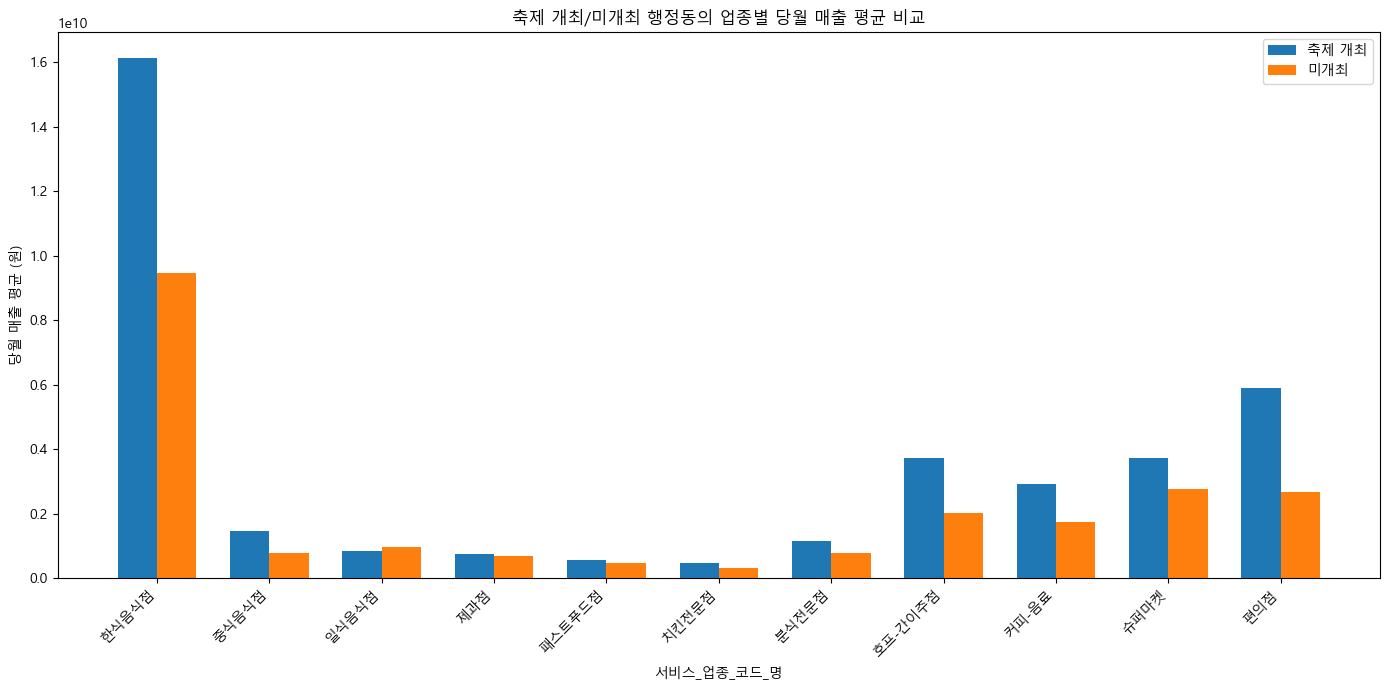

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'

target_industries = [
    '한식음식점', '중식음식점', '일식음식점', '제과점', '패스트푸드점', 
    '치킨전문점', '분식전문점', '호프-간이주점', '커피-음료', '슈퍼마켓', '편의점'
]

# festival_df, no_festival_df를 이미 불러온 상태라고 가정

# 1. 업종별로 매출 평균 계산 (축제, 비축제 각각)
grouped_festival = (
    festival_df[festival_df['서비스_업종_코드_명'].isin(target_industries)]
    .groupby('서비스_업종_코드_명')['당월_매출_금액']
    .mean()
    .reindex(target_industries)
)

grouped_no_festival = (
    no_festival_df[no_festival_df['서비스_업종_코드_명'].isin(target_industries)]
    .groupby('서비스_업종_코드_명')['당월_매출_금액']
    .mean()
    .reindex(target_industries)
)

# 2. 그래프 그리기
x = np.arange(len(target_industries))  # 업종 수만큼 x 인덱스
width = 0.35  # 막대 폭

plt.figure(figsize=(14, 7))
plt.bar(x - width/2, grouped_festival, width, label='축제 개최')
plt.bar(x + width/2, grouped_no_festival, width, label='미개최')

plt.xlabel('서비스_업종_코드_명')
plt.ylabel('당월 매출 평균 (원)')
plt.title('축제 개최/미개최 행정동의 업종별 당월 매출 평균 비교')
plt.xticks(x, target_industries, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


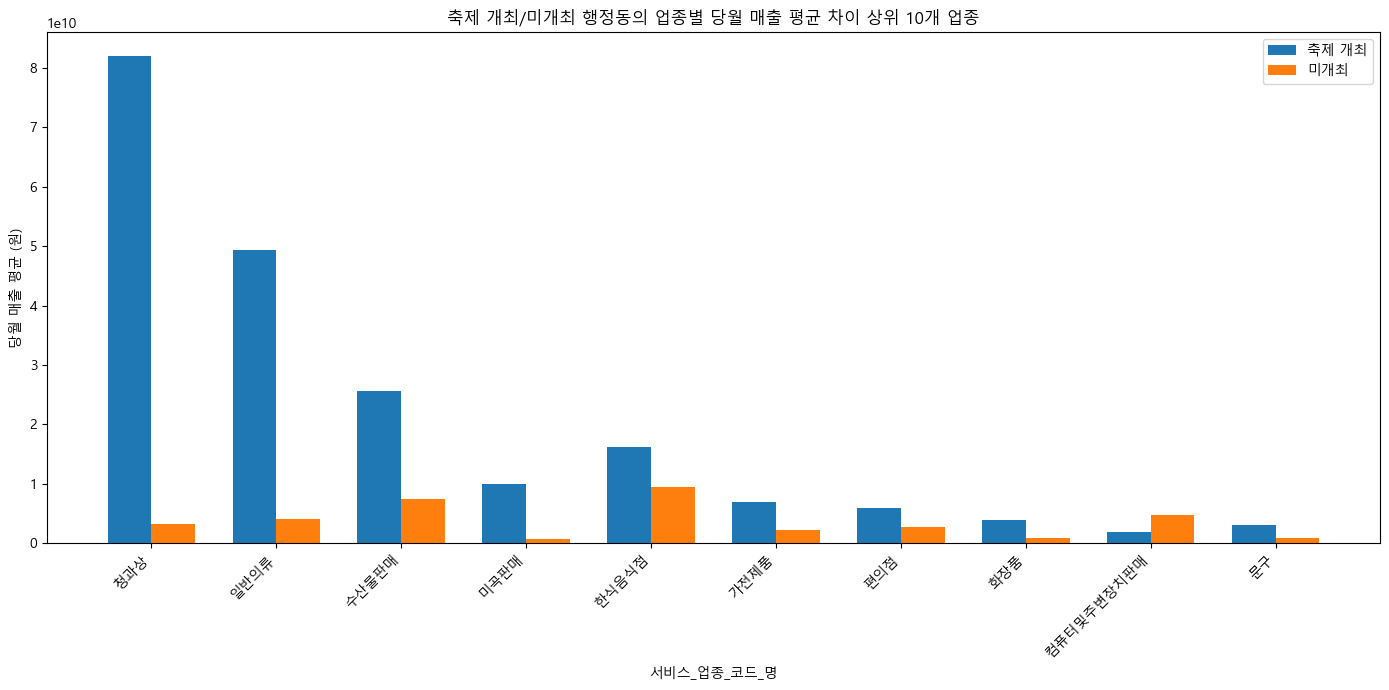

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'

# festival_df, no_festival_df를 이미 불러온 상태라고 가정

# 1. 축제/미개최 각각 업종별 매출 평균 구하기
mean_festival = festival_df.groupby('서비스_업종_코드_명')['당월_매출_금액'].mean()
mean_no_festival = no_festival_df.groupby('서비스_업종_코드_명')['당월_매출_금액'].mean()

# 2. 두 데이터프레임을 하나로 합치기
mean_compare = pd.DataFrame({
    '축제_개최': mean_festival,
    '미개최': mean_no_festival
}).dropna()  # 둘 다 존재하는 업종만

# 3. 매출 평균 차이 계산 (절대값)
mean_compare['차이'] = (mean_compare['축제_개최'] - mean_compare['미개최']).abs()

# 4. 차이 큰 순서대로 상위 10개 업종 추출
top10 = mean_compare.sort_values('차이', ascending=False).head(10)

# 5. 그래프 그리기
x = np.arange(len(top10))
width = 0.35

plt.figure(figsize=(14, 7))
plt.bar(x - width/2, top10['축제_개최'], width, label='축제 개최')
plt.bar(x + width/2, top10['미개최'], width, label='미개최')

plt.xlabel('서비스_업종_코드_명')
plt.ylabel('당월 매출 평균 (원)')
plt.title('축제 개최/미개최 행정동의 업종별 당월 매출 평균 차이 상위 10개 업종')
plt.xticks(x, top10.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


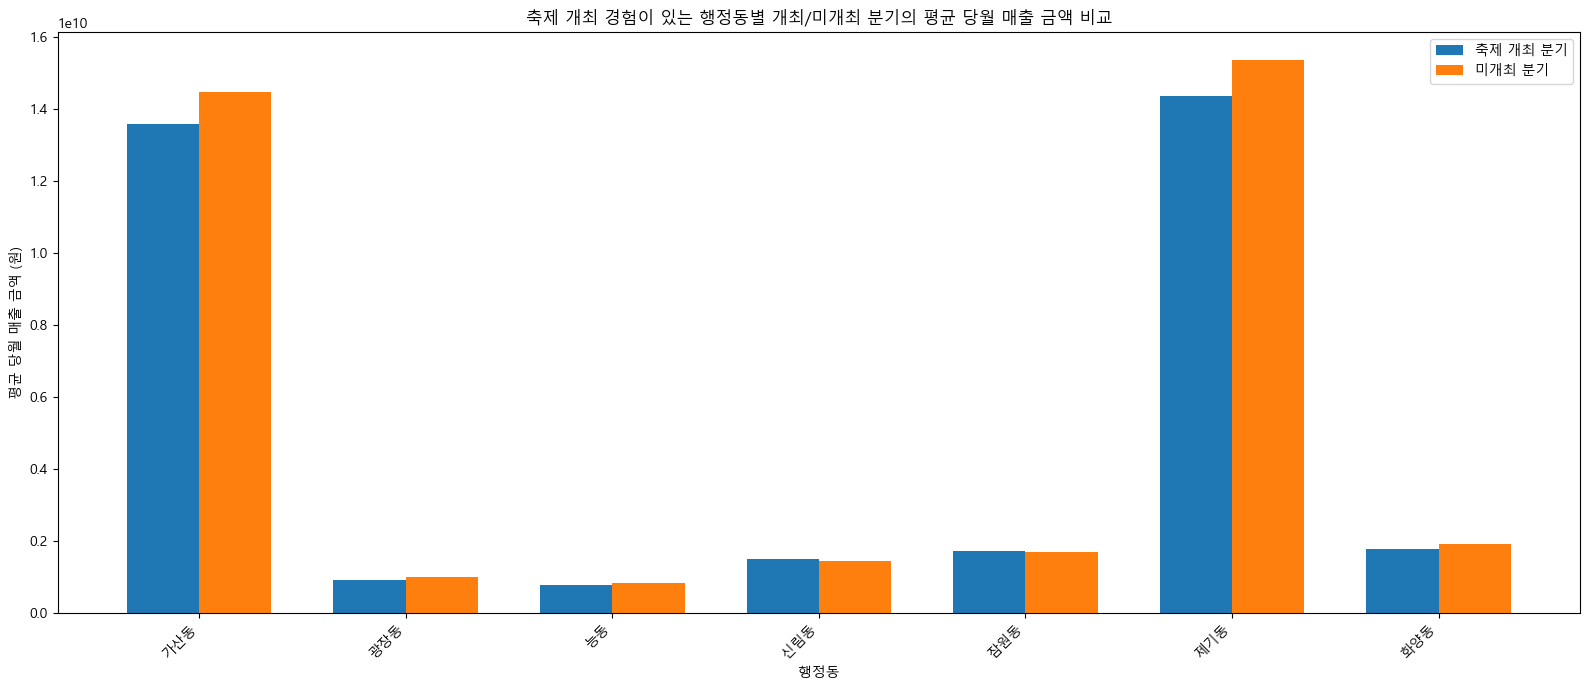

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'

# '시설명' 컬럼이 있을 경우, 축제 개최 여부 생성(없으면 생략)
if '시설명' in df.columns:
    merged_df['축제개최'] = merged_df['시설명'].notna().astype(int)
else:
    # 예시에서는 축제개최 컬럼 미생성
    merged_df['축제개최'] = 0  # (실제 분석에서는 이 부분을 수정 필요)

# 컬럼명 정리
# 기준_년분기_코드	행정동_코드_명	서비스_업종_코드_명	당월_매출_금액
# 축제개최 (시설명 등으로 판단)

# 1. 행정동/분기/축제개최별로 평균 매출 계산
grouped = (
    merged_df.groupby(['행정동_코드_명', '기준_년분기_코드', '축제개최'])
    .agg(
        총매출=('당월_매출_금액', 'sum'),
        업종수=('서비스_업종_코드_명', 'count')  # 각 행정동/분기의 업종 row 개수
    )
    .reset_index()
)

grouped['평균_매출'] = grouped['총매출'] / grouped['업종수']

# 2. 행정동/축제개최별 평균 (여러 분기에 걸쳐 평균)
final = (
    grouped.groupby(['행정동_코드_명', '축제개최'])['평균_매출']
    .mean()
    .unstack()
)

# ★ 축제가 개최된 적이 있는 행정동만 추출 (축제개최==1 값이 존재하는 행정동만)
final = final[final[1].notna()]

# 3. 그래프 준비
dong_names = final.index.tolist()
mean_with_festival = final[1] if 1 in final.columns else [np.nan] * len(final)  # 개최
mean_without_festival = final[0] if 0 in final.columns else [np.nan] * len(final)  # 미개최

x = np.arange(len(dong_names))
width = 0.35

plt.figure(figsize=(16, 7))
plt.bar(x - width/2, mean_with_festival, width, label='축제 개최 분기')
plt.bar(x + width/2, mean_without_festival, width, label='미개최 분기')

plt.xlabel('행정동')
plt.ylabel('평균 당월 매출 금액 (원)')
plt.title('축제 개최 경험이 있는 행정동별 개최/미개최 분기의 평균 당월 매출 금액 비교')
plt.xticks(x, dong_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


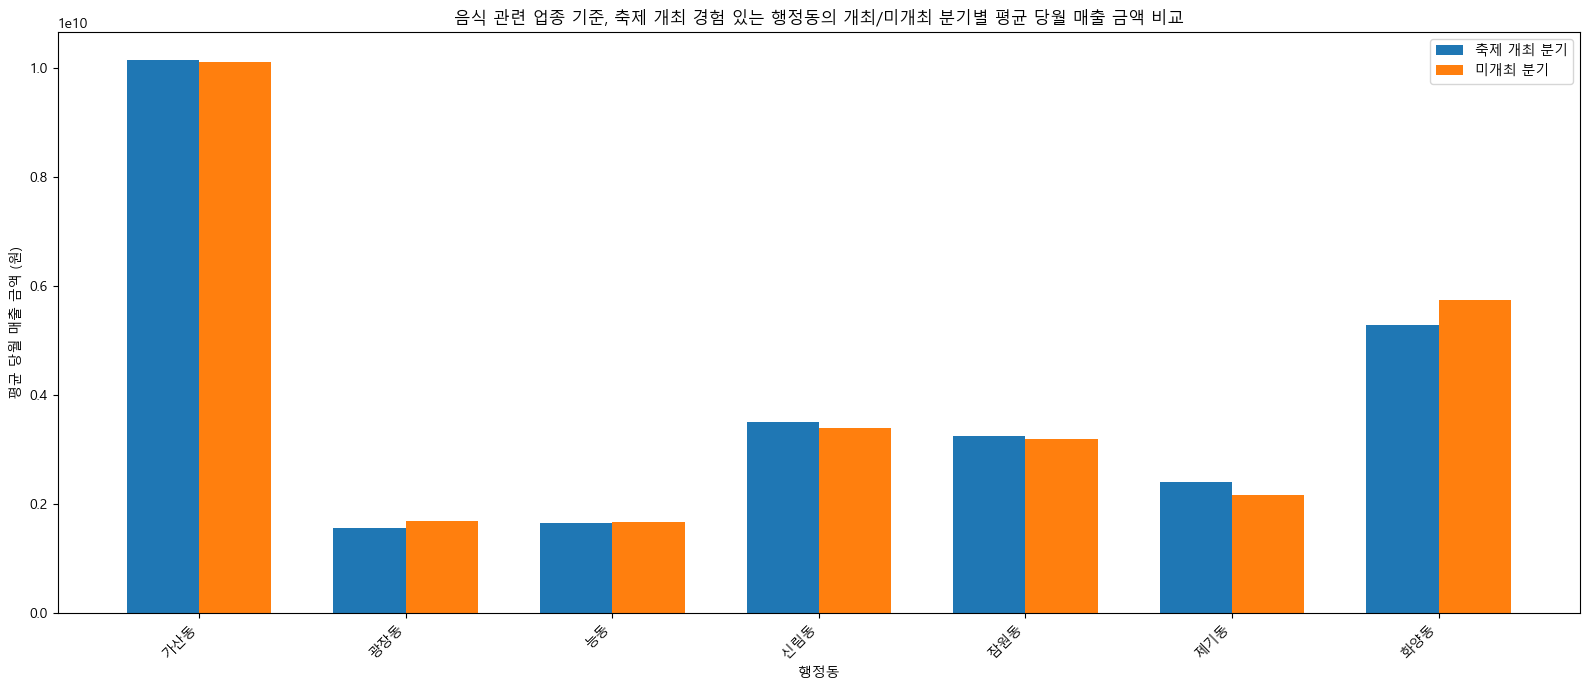

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'

# 음식 관련 업종명 리스트
food_industries = [
    '한식음식점', '중식음식점', '일식음식점', '제과점', '패스트푸드점',
    '치킨전문점', '분식전문점', '호프-간이주점', '커피-음료', '슈퍼마켓', '편의점'
]

# 1. 음식 관련 업종만 필터링
df_food = merged_df[merged_df['서비스_업종_코드_명'].isin(food_industries)].copy()

# 2. 축제 개최 여부 생성 (시설명 컬럼이 존재할 경우)
if '시설명' in df_food.columns:
    df_food['축제개최'] = df_food['시설명'].notna().astype(int)
else:
    df_food['축제개최'] = 0  # 예시

# 3. 행정동/분기/축제개최별로 평균 매출 계산
grouped = (
    df_food.groupby(['행정동_코드_명', '기준_년분기_코드', '축제개최'])
    .agg(
        총매출=('당월_매출_금액', 'sum'),
        업종수=('서비스_업종_코드_명', 'count')
    )
    .reset_index()
)
grouped['평균_매출'] = grouped['총매출'] / grouped['업종수']

# 4. 행정동/축제개최별로 여러 분기 평균
final = (
    grouped.groupby(['행정동_코드_명', '축제개최'])['평균_매출']
    .mean()
    .unstack()
)

# 5. 축제가 개최된 적이 있는 행정동만 추출
final = final[final[1].notna()]

# 6. 그래프
dong_names = final.index.tolist()
mean_with_festival = final[1] if 1 in final.columns else [np.nan] * len(final)
mean_without_festival = final[0] if 0 in final.columns else [np.nan] * len(final)

x = np.arange(len(dong_names))
width = 0.35

plt.figure(figsize=(16, 7))
plt.bar(x - width/2, mean_with_festival, width, label='축제 개최 분기')
plt.bar(x + width/2, mean_without_festival, width, label='미개최 분기')

plt.xlabel('행정동')
plt.ylabel('평균 당월 매출 금액 (원)')
plt.title('음식 관련 업종 기준, 축제 개최 경험 있는 행정동의 개최/미개최 분기별 평균 당월 매출 금액 비교')
plt.xticks(x, dong_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()



=== 행정동별 Top10 업종 및 개최/미개최 평균 매출(원) ===

[광장동]
축제개최               미개최 평균         개최 평균            차이
서비스_업종_코드_명                                          
화장품         1,778,268,872   196,737,605 1,581,531,267
일반의원        5,311,133,535 3,921,555,850 1,389,577,685
조명용품          213,971,988   969,814,211   755,842,223
한식음식점       5,852,357,509 5,179,872,418   672,485,091
외국어학원         409,412,614   945,560,207   536,147,593
치과의원        1,495,648,339 1,933,308,195   437,659,856
편의점         2,885,124,077 2,501,519,510   383,604,567
일반의류        4,215,226,075 3,925,002,824   290,223,251
서적            553,898,911   762,074,289   208,175,378
슈퍼마켓        4,101,424,110 3,964,790,726   136,633,384
--------------------------------------------------
[능동]
축제개최               미개최 평균         개최 평균            차이
서비스_업종_코드_명                                          
가구          4,729,071,801 3,125,201,741 1,603,870,060
커피-음료         695,376,155   952,903,046   257,526,891
한식음식점       8,785,104,819 8,536,

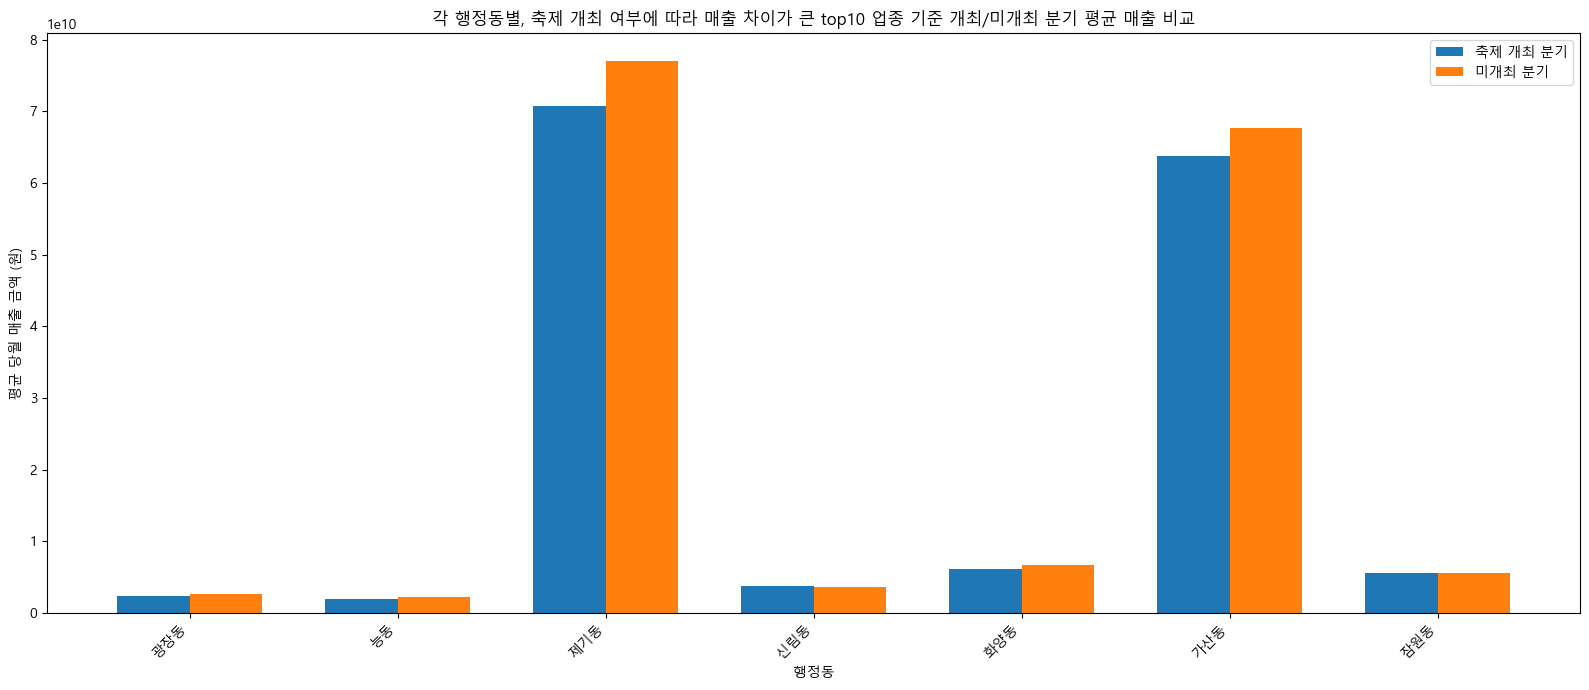

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'

festival_dongs = merged_df.loc[merged_df['시설명'].notna(), '행정동_코드_명'].unique()

result_dict = {}
top10_industry_stats = {}

for dong in festival_dongs:
    dong_df = merged_df[merged_df['행정동_코드_명'] == dong]
    industry_pivot = dong_df.groupby(['서비스_업종_코드_명', '축제개최'])['당월_매출_금액'].mean().unstack()
    industry_pivot = industry_pivot.dropna(subset=[0, 1], how='any')
    industry_pivot['차이'] = (industry_pivot[1] - industry_pivot[0]).abs()
    top10 = industry_pivot.sort_values('차이', ascending=False).head(10)
    top10_industry_stats[dong] = top10[[0, 1, '차이']]

    dong_top10_df = dong_df[dong_df['서비스_업종_코드_명'].isin(top10.index)]
    grouped = dong_top10_df.groupby('축제개최')['당월_매출_금액'].mean()
    result_dict[dong] = grouped

# 결과 DataFrame으로 변환
final = pd.DataFrame(result_dict).T

pd.set_option('display.float_format', lambda x: f'{x:,.0f}')  # 천단위 콤마 표시

print('\n=== 행정동별 Top10 업종 및 개최/미개최 평균 매출(원) ===\n')
for dong, df in top10_industry_stats.items():
    print(f'[{dong}]')
    display_df = df.rename(columns={0: "미개최 평균", 1: "개최 평균"})
    print(display_df)
    print('-' * 50)

# --- 그래프 ---
x = np.arange(len(final))
width = 0.35

plt.figure(figsize=(16, 7))
plt.bar(x - width/2, final[1], width, label='축제 개최 분기')
plt.bar(x + width/2, final[0], width, label='미개최 분기')
plt.xlabel('행정동')
plt.ylabel('평균 당월 매출 금액 (원)')
plt.title('각 행정동별, 축제 개최 여부에 따라 매출 차이가 큰 top10 업종 기준 개최/미개최 분기 평균 매출 비교')
plt.xticks(x, final.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

### 축제와 관광지 유무에 따른 데이터 분석

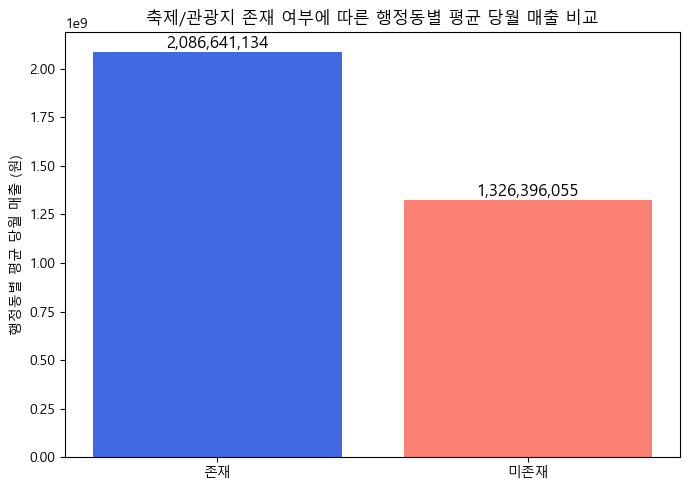

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'

# 1. '상호명' 또는 '시설명'에 값이 있으면 '축제/관광지 존재'로 표시
def is_exist(row):
    return (
        (pd.notna(row['상호명']) and str(row['상호명']).strip() != '') or
        (pd.notna(row['시설명']) and str(row['시설명']).strip() != '')
    )

df0['축제관광지_존재'] = df0.apply(is_exist, axis=1).astype(int)

# 2. 행정동별로 '존재' 여부와 총 매출 평균 집계
# (업종 다 합친 매출로 되어 있다고 하셨으니, 이미 행정동-분기별 합계인 경우)
grouped = df0.groupby(['행정동_코드_명', '축제관광지_존재'])['당월_매출_금액'].mean().reset_index()

# 3. '존재'와 '미존재' 집단별 평균 계산
exist_mean = grouped[grouped['축제관광지_존재'] == 1]['당월_매출_금액'].mean()
not_exist_mean = grouped[grouped['축제관광지_존재'] == 0]['당월_매출_금액'].mean()

# 4. 그래프 그리기
labels = ['존재', '미존재']
means = [exist_mean, not_exist_mean]

plt.figure(figsize=(7, 5))
bars = plt.bar(labels, means, color=['royalblue', 'salmon'])
plt.ylabel('행정동별 평균 당월 매출 (원)')
plt.title('축제/관광지 존재 여부에 따른 행정동별 평균 당월 매출 비교')

# 값 표시
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():,.0f}', 
             ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


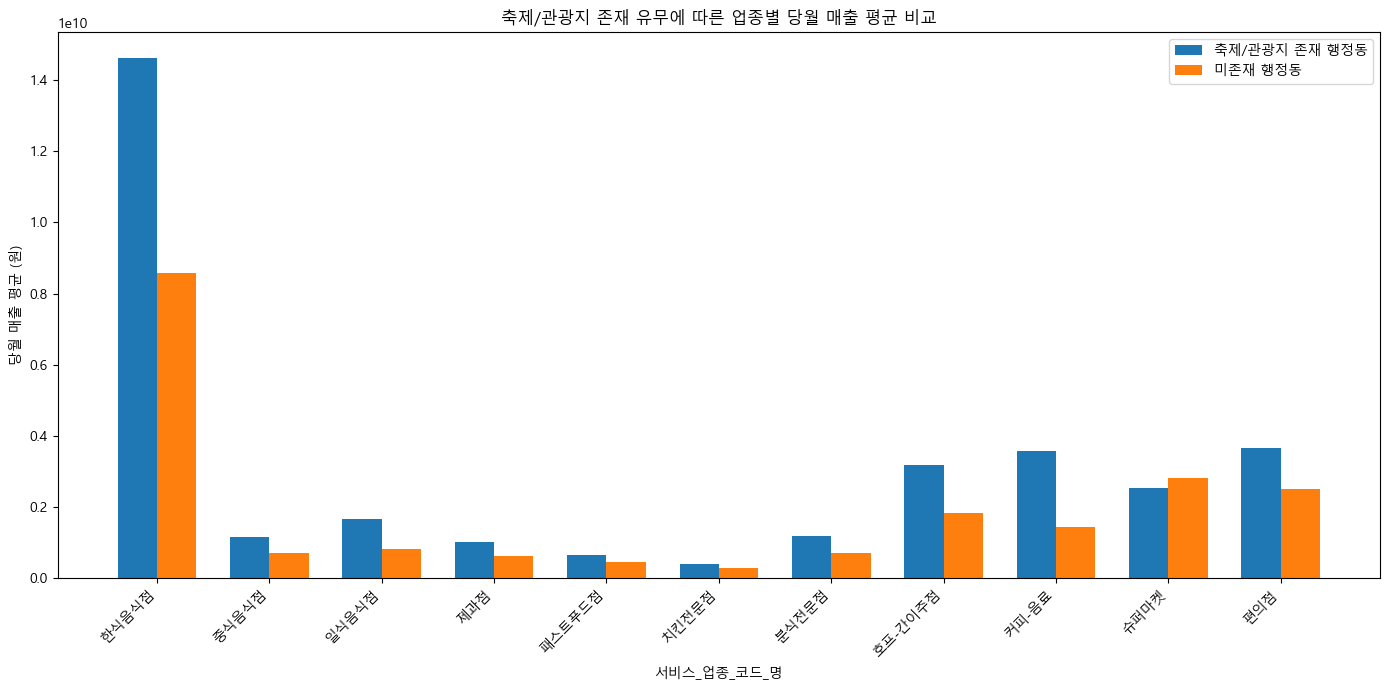

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'

# 2. 비교할 업종 리스트
target_industries = [
    '한식음식점', '중식음식점', '일식음식점', '제과점', '패스트푸드점', 
    '치킨전문점', '분식전문점', '호프-간이주점', '커피-음료', '슈퍼마켓', '편의점'
]

# 3. 존재하는 행정동(축제/관광지)의 업종별 평균 매출
grouped_exist = (
    merged_with_places_festival[merged_with_places_festival['서비스_업종_코드_명'].isin(target_industries)]
    .groupby('서비스_업종_코드_명')['당월_매출_금액']
    .mean()
    .reindex(target_industries)
)

# 4. 존재하지 않는 행정동의 업종별 평균 매출
grouped_not_exist = (
    merged_no_places_festival[merged_no_places_festival['서비스_업종_코드_명'].isin(target_industries)]
    .groupby('서비스_업종_코드_명')['당월_매출_금액']
    .mean()
    .reindex(target_industries)
)

# 5. 그래프 그리기
x = np.arange(len(target_industries))
width = 0.35

plt.figure(figsize=(14, 7))
plt.bar(x - width/2, grouped_exist, width, label='축제/관광지 존재 행정동')
plt.bar(x + width/2, grouped_not_exist, width, label='미존재 행정동')

plt.xlabel('서비스_업종_코드_명')
plt.ylabel('당월 매출 평균 (원)')
plt.title('축제/관광지 존재 유무에 따른 업종별 당월 매출 평균 비교')
plt.xticks(x, target_industries, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


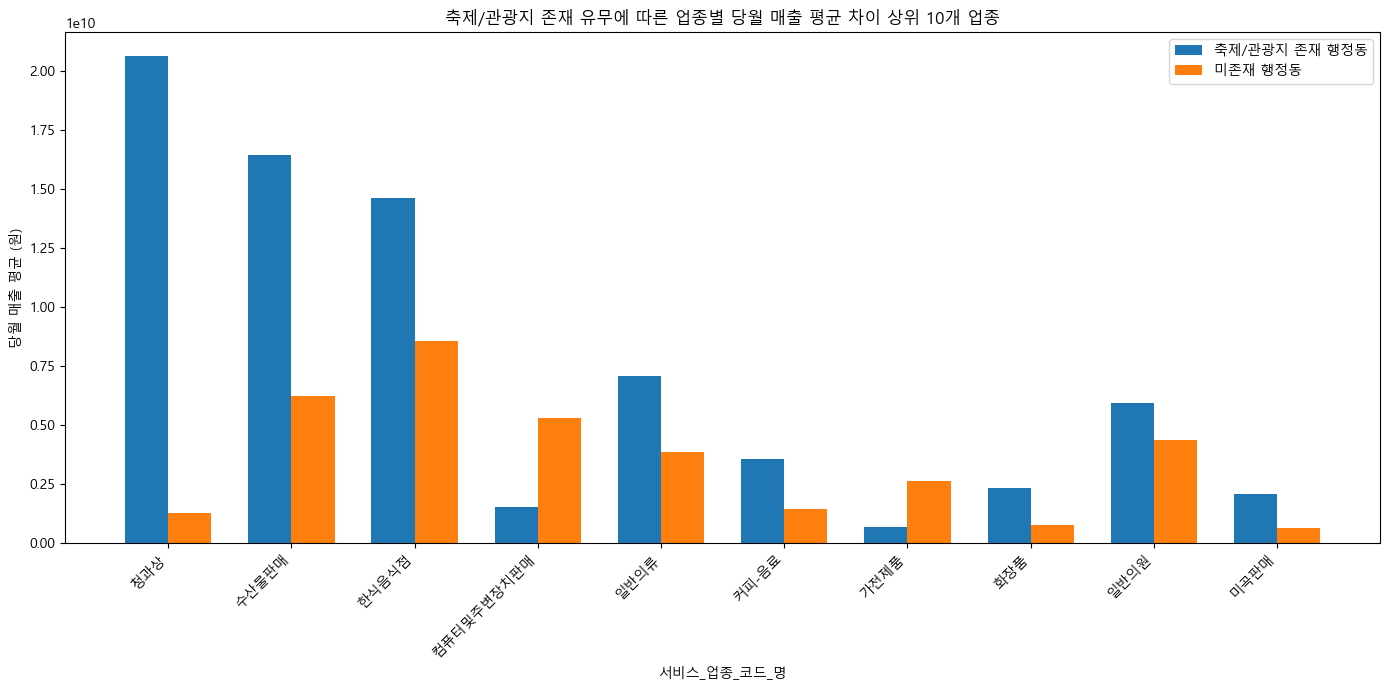

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'

# 1. 축제 또는 관광지 존재/미존재 각각 업종별 매출 평균 구하기
mean_exist = merged_with_places_festival.groupby('서비스_업종_코드_명')['당월_매출_금액'].mean()
mean_not_exist = merged_no_places_festival.groupby('서비스_업종_코드_명')['당월_매출_금액'].mean()

# 2. 두 데이터프레임을 하나로 합치기 (둘 다 존재하는 업종만)
mean_compare = pd.DataFrame({
    '존재': mean_exist,
    '미존재': mean_not_exist
}).dropna()

# 3. 매출 평균 차이 계산 (절대값)
mean_compare['차이'] = (mean_compare['존재'] - mean_compare['미존재']).abs()

# 4. 차이 큰 순서대로 상위 10개 업종 추출
top10 = mean_compare.sort_values('차이', ascending=False).head(10)

# 5. 그래프 그리기
x = np.arange(len(top10))
width = 0.35

plt.figure(figsize=(14, 7))
plt.bar(x - width/2, top10['존재'], width, label='축제/관광지 존재 행정동')
plt.bar(x + width/2, top10['미존재'], width, label='미존재 행정동')

plt.xlabel('서비스_업종_코드_명')
plt.ylabel('당월 매출 평균 (원)')
plt.title('축제/관광지 존재 유무에 따른 업종별 당월 매출 평균 차이 상위 10개 업종')
plt.xticks(x, top10.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()
